# The agrovision dataset

In [2]:
import os
import numpy as np
import numpy.ma as ma
import pylab as pl
import matplotlib.cm as cm
import skimage
import unidecode
import joblib
import skimage.color as skcolor
%matplotlib inline

In [3]:
data = joblib.load('../data/data.joblib')

# RGB Image

In [4]:
img = data['img']

(-0.5, 2424.5, 2174.5, -0.5)

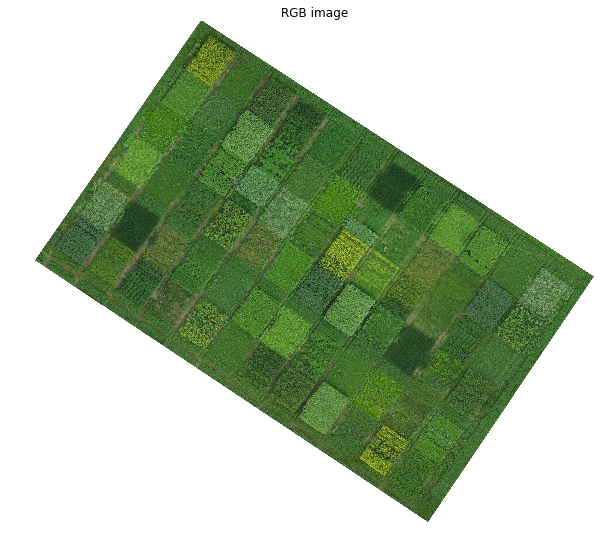

In [5]:
pl.figure(figsize=(10,10))
pl.title('RGB image')
pl.imshow(img)
pl.axis('off')

# DSM

In [6]:
dsm = data['dsm']
# -9999 is no data
dsm = ma.masked_where(dsm <= -9998, dsm)

(-0.5, 2424.5, 2174.5, -0.5)

/Users/julien/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


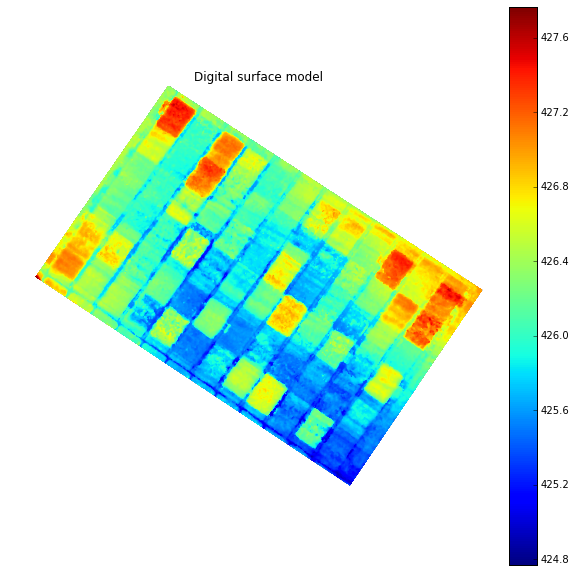

In [7]:
pl.figure(figsize=(10,10))
pl.title('Digital surface model')
pl.imshow(dsm)
pl.colorbar()
pl.axis('off')

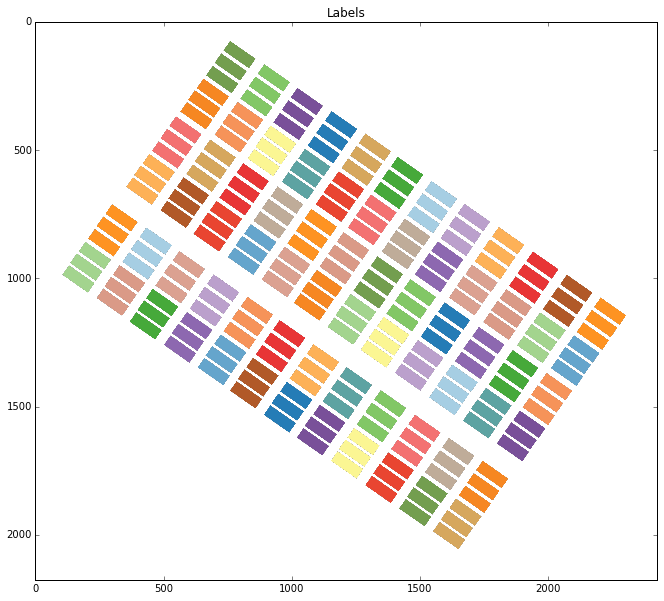

In [11]:
pl.figure(figsize=(12, 10))
pl.title('Labels')
labels = data['labels']['labels_1']['labels']
labels = ma.masked_where(labels == -1, labels)

pl.imshow(labels, cmap=cm.Paired)

# Labels

We have arranged the labels in 7 different ways. Since there are 3 repetitions for each crop, we have divided the labels in 3 folds that you can use for cross-validation. We propose 3 different ways to do the folds as you can see in the first row below.

In the second row, we removed some parcels where the crops didn't really grow and so the labels are misleading.

Finally, the last labelling contains full polygons.

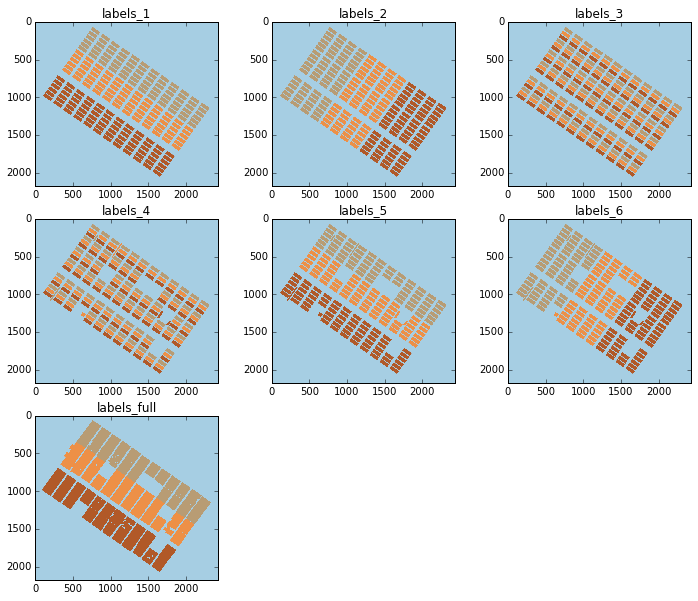

In [12]:
pl.figure(figsize=(12, 10))
pl.title('Label folds')
for i, (lname, ldata) in enumerate(data['labels'].items()):
    folds = ldata['folds']
    labels = ldata['labels']
    # label == -1 indicates no label
    labels = ma.masked_where(labels == -1, labels)
    
    pl.subplot(3, 3, i + 1)
    pl.title('%s' % lname)
    pl.imshow(folds, cmap=cm.Paired)